Masen Boucher
QNC Presentation 2
November 22, 2024

Code to plot existing high throughput assay data, simulate theoretical CRISPR data, and analyze, including flow cytometry and plate reader assays.

In [12]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd

!pip install scikit_posthocs
import scikit_posthocs as sp

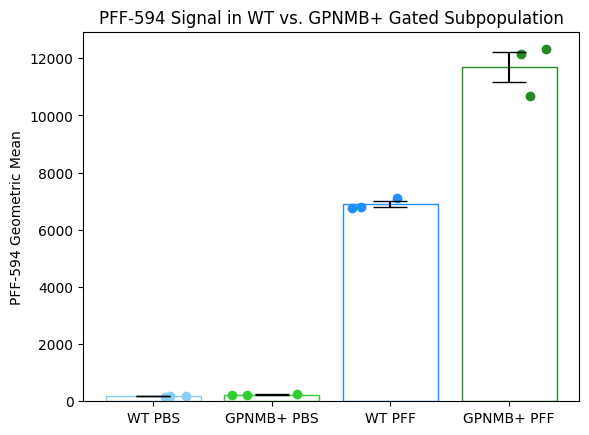

F-statistic: 87.43742282321432
p-value: 1.8654906984531217e-06


,WT PBS,GPNM+B PBS,WT PFF,GPNMB+ PFF
WT PBS,1.000000e+00,9.995037e-01,9.092229e-07,1.294415e-08
GPNM+B PBS,9.995037e-01,1.000000e+00,9.583905e-07,1.335431e-08
WT PFF,9.092229e-07,9.583905e-07,1.000000e+00,1.176693e-05
GPNMB+ PFF,1.294415e-08,1.335431e-08,1.176693e-05,1.000000e+00


In [24]:
#Flow Cytometry Data

#Plotting the initial summary data
#X-Coordinates/Spacing for Bars
x = [1, 2, 3, 4]
#Colors for the bars
colors = ['lightskyblue', 'limegreen','dodgerblue', 'forestgreen']
#Data
groups = ["WT PBS", "GPNMB+ PBS", "WT PFF", "GPNMB+ PFF"]
WT_PBS_Y= np.array([163.11581, 197.04352, 192.0288256])
G_PBS_Y= np.array([210, 246,232])
WT_PFF_Y= np.array([6785.556, 7123.522954, 6777])
G_PFF_Y=np.array([12317, 12135, 10669])
y = [WT_PBS_Y, G_PBS_Y,WT_PFF_Y,G_PFF_Y]
#Plot
fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[st.sem(yi) for yi in y],    #Error Bars - Standard Error of Mean
       capsize=12, #Caps at end of error bars
       width=0.8,    #Bar width for plots
       tick_label=groups, #Labels for each condition
       color=[0,0,0,0],  #Making the bars clear so we can see the data points
       edgecolor=colors, #Bar colors
       )

for i in range(len(x)):
    #Distribute data points randomly across the bar
    ax.scatter(x[i] + np.random.random(y[i].size) * 0.8 - 0.8 / 2, y[i], color=colors[i])

plt.title(f'PFF-594 Signal in WT vs. GPNMB+ Gated Subpopulation')
plt.ylabel('PFF-594 Geometric Mean')
plt.show()


#ANOVA
f_statistic, p_value = st.f_oneway(No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

#Post-Hoc Tests
x = pd.DataFrame({"WT PBS": WT_PBS_Y, "GPNM+B PBS": G_PBS_Y, "WT PFF": WT_PFF_Y,"GPNMB+ PFF": G_PFF_Y})
x = x.melt(var_name='groups', value_name='values')
sp.posthoc_scheffe(x, val_col='values', group_col='groups')

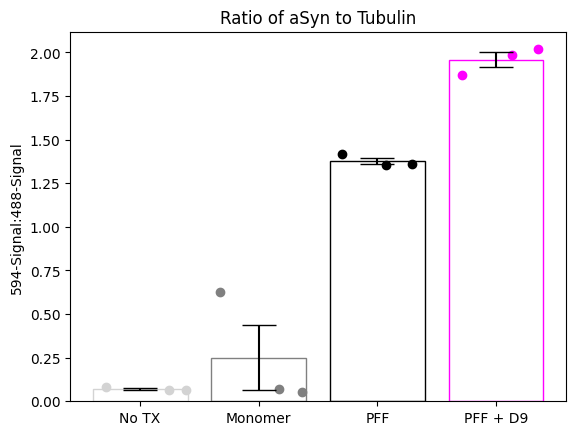

F-statistic: 87.43742282321432
p-value: 1.8654906984531217e-06


,No TX,Monomer,PFF,PFF + D9
No TX,1.000000,0.642688,0.000100,0.000006
Monomer,0.642688,1.000000,0.000293,0.000014
PFF,0.000100,0.000293,1.000000,0.019164
PFF + D9,0.000006,0.000014,0.019164,1.000000


In [16]:
#Plate Reader Data

#Plotting the initial data - aSyn to Tubulin
#X-Coordinates/Spacing for Bars
x = [1, 2, 3, 4]
#Colors for the bars
colors = ['lightgrey', 'grey','black', 'magenta']
#Data
groups = ["No TX", "Monomer", "PFF", "PFF + D9"]
No_TX_Y= np.array([0.0625, 0.08, 0.064])
Monomer_Y= np.array([0.0527, 0.0723,0.625])
PFF_Y= np.array([1.3573, 1.4165, 1.3588])
PFF_D9_Y=np.array([1.9849, 2.0181, 1.8728])
y = [No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y]
#Plot
fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[st.sem(yi) for yi in y],    #Error Bars - Standard Error of Mean
       capsize=12, #Caps at end of error bars
       width=0.8,    #Bar width for plots
       tick_label=groups, #Labels for each condition
       color=[0,0,0,0],  #Making the bars clear so we can see the data points
       edgecolor=colors, #Bar colors
       )

for i in range(len(x)):
    #Distribute data points randomly across the bar
    ax.scatter(x[i] + np.random.random(y[i].size) * 0.8 - 0.8 / 2, y[i], color=colors[i])

plt.title(f'Ratio of aSyn to Tubulin')
plt.ylabel('594-Signal:488-Signal')
plt.show()

#ANOVA
f_statistic, p_value = st.f_oneway(No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

#Post-Hoc Tests
x = pd.DataFrame({"No TX": No_TX_Y, "Monomer": Monomer_Y, "PFF": PFF_Y,"PFF + D9": PFF_D9_Y})
x = x.melt(var_name='groups', value_name='values')
sp.posthoc_scheffe(x, val_col='values', group_col='groups')

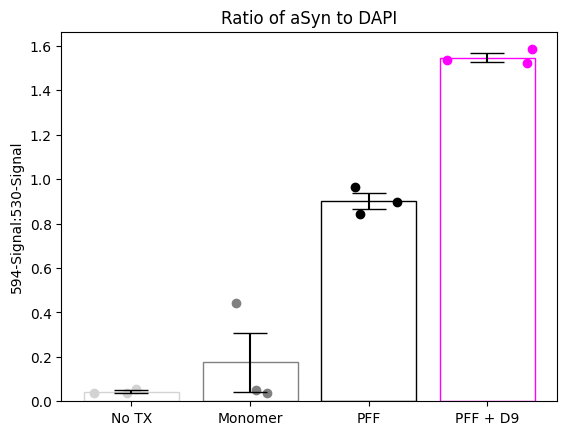

F-statistic: 102.04737227478829
p-value: 1.024437052523577e-06


,No TX,Monomer,PFF,PFF + D9
No TX,1.000000,0.624415,0.000184,0.000003
Monomer,0.624415,1.000000,0.000600,0.000006
PFF,0.000184,0.000600,1.000000,0.001316
PFF + D9,0.000003,0.000006,0.001316,1.000000


In [17]:
#Plate Reader Data

#Plotting the initial data - aSyn to DAPI
#X-Coordinates/Spacing for Bars
x = [1, 2, 3, 4]
#Colors for the bars
colors = ['lightgrey', 'grey','black', 'magenta']
#Data
groups = ["No TX", "Monomer", "PFF", "PFF + D9"]
No_TX_Y= np.array([0.038964, 0.054353, 0.03758])
Monomer_Y= np.array([0.037385, 0.050739, 0.44062])
PFF_Y= np.array([0.844218, 0.896676, 0.963747])
PFF_D9_Y=np.array([1.584561, 1.523154, 1.534422])
y = [No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y]
#Plot
fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[st.sem(yi) for yi in y],    #Error Bars - Standard Error of Mean
       capsize=12, #Caps at end of error bars
       width=0.8,    #Bar width for plots
       tick_label=groups, #Labels for each condition
       color=[0,0,0,0],  #Making the bars clear so we can see the data points
       edgecolor=colors, #Bar colors
       )

for i in range(len(x)):
    #Distribute data points randomly across the bar
    ax.scatter(x[i] + np.random.random(y[i].size) * 0.8 - 0.8 / 2, y[i], color=colors[i])

plt.title(f'Ratio of aSyn to DAPI')
plt.ylabel('594-Signal:530-Signal')
plt.show()

#ANOVA
f_statistic, p_value = st.f_oneway(No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

#Post-Hoc Tests
x = pd.DataFrame({"No TX": No_TX_Y, "Monomer": Monomer_Y, "PFF": PFF_Y,"PFF + D9": PFF_D9_Y})
x = x.melt(var_name='groups', value_name='values')
sp.posthoc_scheffe(x, val_col='values', group_col='groups')

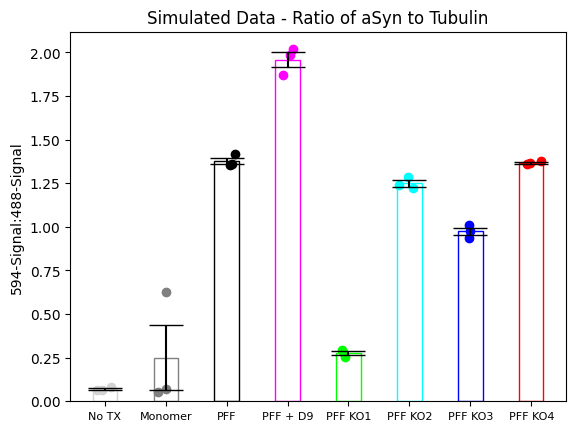

F-statistic: 94.58496582099306
p-value: 8.092009562134907e-12


,No TX,Monomer,PFF,PFF + D9,PFF KO1,PFF KO2,PFF KO3,PFF KO4
No TX,1.000000e+00,8.298927e-01,1.563689e-07,6.844285e-10,7.153880e-01,6.713807e-07,0.000024,1.757709e-07
Monomer,8.298927e-01,1.000000e+00,1.272456e-06,3.125449e-09,9.999987e-01,6.516308e-06,0.000358,1.450362e-06
PFF,1.563689e-07,1.272456e-06,1.000000e+00,3.634650e-03,1.770797e-06,9.671286e-01,0.067555,1.000000e+00
PFF + D9,6.844285e-10,3.125449e-09,3.634650e-03,1.000000e+00,3.958549e-09,4.501353e-04,0.000008,3.044044e-03
PFF KO1,7.153880e-01,9.999987e-01,1.770797e-06,3.958549e-09,1.000000e+00,9.329749e-06,0.000547,2.022936e-06
PFF KO2,6.713807e-07,6.516308e-06,9.671286e-01,4.501353e-04,9.329749e-06,1.000000e+00,0.392316,9.795303e-01
PFF KO3,2.385877e-05,3.578577e-04,6.755529e-02,7.909784e-06,5.471061e-04,3.923156e-01,1.000000,7.974680e-02
PFF KO4,1.757709e-07,1.450362e-06,1.000000e+00,3.044044e-03,2.022936e-06,9.795303e-01,0.079747,1.000000e+00


In [21]:
#Plate Reader Data

#Data with simulated CRISPR-KO effects
#Plotting the initial data - aSyn to Tubulin
#Setting a random seed
np.random.seed(123)
#X-Coordinates/Spacing for Bars
x = [1, 2, 3, 4, 5, 6, 7, 8]
#Colors for the bars
colors = ['lightgrey', 'grey','black', 'magenta', "lime", "aqua", "blue", "red"]
#Data
groups = ["No TX", "Monomer", "PFF", "PFF + D9", "PFF KO1", "PFF KO2", "PFF KO3", "PFF KO4"]
No_TX_Y= np.array([0.0625, 0.08, 0.064])
Monomer_Y= np.array([0.0527, 0.0723,0.625])
PFF_Y= np.array([1.3573, 1.4165, 1.3588])
PFF_D9_Y=np.array([1.9849, 2.0181, 1.8728])
PFF_KO1_Y= np.array(np.random.normal((np.mean(PFF_Y)/5), st.sem(PFF_Y),3))
PFF_KO2_Y= np.array(np.random.normal((np.mean(PFF_Y)/1.1), st.sem(PFF_Y),3))
PFF_KO3_Y= np.array(np.random.normal((np.mean(PFF_Y)/1.4), st.sem(PFF_Y),3))
PFF_KO4_Y= np.array(np.random.normal((np.mean(PFF_Y)/1), st.sem(PFF_Y),3))
y = [No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y, PFF_KO1_Y, PFF_KO2_Y, PFF_KO3_Y, PFF_KO4_Y]
#Plot
fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[st.sem(yi) for yi in y],    #Error Bars - Standard Error of Mean
       capsize=12, #Caps at end of error bars
       width=0.4,    #Bar width for plots
       tick_label=groups, #Labels for each condition
       color=[0,0,0,0],  #Making the bars clear so we can see the data points
       edgecolor=colors, #Bar colors
       )

for i in range(len(x)):
    #Distribute data points randomly across the bar
    ax.scatter(x[i] + np.random.random(y[i].size) * 0.4 - 0.4 / 2, y[i], color=colors[i])

plt.title(f'Simulated Data - Ratio of aSyn to Tubulin')
plt.ylabel('594-Signal:488-Signal')
plt.xticks(fontsize=8)
plt.show()

#ANOVA
f_statistic, p_value = st.f_oneway(No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y, PFF_KO1_Y, PFF_KO2_Y, PFF_KO3_Y, PFF_KO4_Y)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

#Post-Hoc Tests
x = pd.DataFrame({"No TX": No_TX_Y, "Monomer": Monomer_Y, "PFF": PFF_Y,"PFF + D9": PFF_D9_Y, "PFF KO1": PFF_KO1_Y, "PFF KO2": PFF_KO2_Y, "PFF KO3": PFF_KO3_Y, "PFF KO4": PFF_KO4_Y})
x = x.melt(var_name='groups', value_name='values')
sp.posthoc_scheffe(x, val_col='values', group_col='groups')

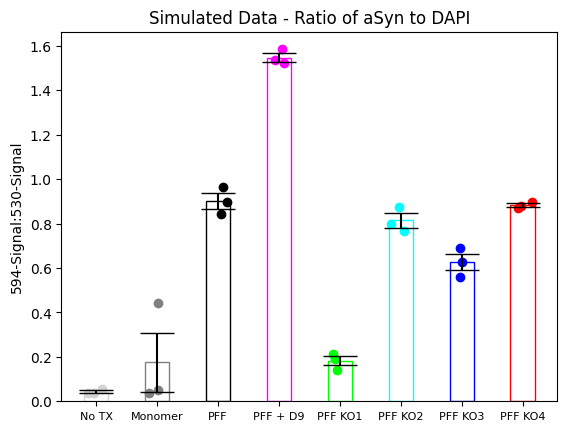

F-statistic: 91.4992652586797
p-value: 1.0465587931379316e-11


,No TX,Monomer,PFF,PFF + D9,PFF KO1,PFF KO2,PFF KO3,PFF KO4
No TX,1.000000e+00,8.512631e-01,0.000001,3.156843e-10,8.201038e-01,0.000005,1.750311e-04,0.000002
Monomer,8.512631e-01,1.000000e+00,0.000011,1.280077e-09,1.000000e+00,0.000057,2.918976e-03,0.000016
PFF,1.169107e-06,1.122436e-05,1.000000,4.945926e-05,1.258063e-05,0.981766,1.225100e-01,0.999999
PFF + D9,3.156843e-10,1.280077e-09,0.000049,1.000000e+00,1.372252e-09,0.000010,4.293528e-07,0.000034
PFF KO1,8.201038e-01,1.000000e+00,0.000013,1.372252e-09,1.000000e+00,0.000065,3.353117e-03,0.000018
PFF KO2,5.004266e-06,5.717357e-05,0.981766,9.810016e-06,6.463950e-05,1.000000,5.116897e-01,0.995696
PFF KO3,1.750311e-04,2.918976e-03,0.122510,4.293528e-07,3.353117e-03,0.511690,1.000000e+00,0.175443
PFF KO4,1.589546e-06,1.583238e-05,0.999999,3.443635e-05,1.777842e-05,0.995696,1.754433e-01,1.000000


In [20]:
#Plate Reader Data

#Data with simulated CRISPR-KO effects
#Plotting the initial data - aSyn to DAPI
#Setting a random seed
np.random.seed(123)
#X-Coordinates/Spacing for Bars
x = [1, 2, 3, 4, 5, 6, 7, 8]
#Colors for the bars
colors = ['lightgrey', 'grey','black', 'magenta', "lime", "aqua", "blue", "red"]
#Data
groups = ["No TX", "Monomer", "PFF", "PFF + D9", "PFF KO1", "PFF KO2", "PFF KO3", "PFF KO4"]
No_TX_Y= np.array([0.038964, 0.054353, 0.03758])
Monomer_Y= np.array([0.037385, 0.050739, 0.44062])
PFF_Y= np.array([0.844218, 0.896676, 0.963747])
PFF_D9_Y=np.array([1.584561, 1.523154, 1.534422])
PFF_KO1_Y= np.array(np.random.normal((np.mean(PFF_Y)/5), st.sem(PFF_Y),3))
PFF_KO2_Y= np.array(np.random.normal((np.mean(PFF_Y)/1.1), st.sem(PFF_Y),3))
PFF_KO3_Y= np.array(np.random.normal((np.mean(PFF_Y)/1.4), st.sem(PFF_Y),3))
PFF_KO4_Y= np.array(np.random.normal((np.mean(PFF_Y)/1), st.sem(PFF_Y),3))
y = [No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y, PFF_KO1_Y, PFF_KO2_Y, PFF_KO3_Y, PFF_KO4_Y]
#Plot
fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[st.sem(yi) for yi in y],    #Error Bars - Standard Error of Mean
       capsize=12, #Caps at end of error bars
       width=0.4,    #Bar width for plots
       tick_label=groups, #Labels for each condition
       color=[0,0,0,0],  #Making the bars clear so we can see the data points
       edgecolor=colors, #Bar colors
       )

for i in range(len(x)):
    #Distribute data points randomly across the bar
    ax.scatter(x[i] + np.random.random(y[i].size) * 0.4 - 0.4 / 2, y[i], color=colors[i])

plt.title(f'Simulated Data - Ratio of aSyn to DAPI')
plt.ylabel('594-Signal:530-Signal')
plt.xticks(fontsize=8)
plt.show()

#ANOVA
f_statistic, p_value = st.f_oneway(No_TX_Y, Monomer_Y, PFF_Y, PFF_D9_Y, PFF_KO1_Y, PFF_KO2_Y, PFF_KO3_Y, PFF_KO4_Y)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

#Post-Hoc Tests
x = pd.DataFrame({"No TX": No_TX_Y, "Monomer": Monomer_Y, "PFF": PFF_Y,"PFF + D9": PFF_D9_Y, "PFF KO1": PFF_KO1_Y, "PFF KO2": PFF_KO2_Y, "PFF KO3": PFF_KO3_Y, "PFF KO4": PFF_KO4_Y})
x = x.melt(var_name='groups', value_name='values')
sp.posthoc_scheffe(x, val_col='values', group_col='groups')